# Setup

In [1]:
using RigidBodyDynamics
using StaticArrays
using Plots
using MeshCatMechanisms
using Base.Test

HTML{String}("    <script class='js-collapse-script'>\n        var curMatch =\n            window.location.href\n            .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n\n        curMatch = curMatch ||\n            window.location.href\n            .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n\n        if ( curMatch ) {\n            \$('head').append('<base href=\"' + curMatch[1] + '/\">');\n        }\n    </script>\n")

HTML{String}("<script class='js-collapse-script' src='pkg/WebIO/webio/dist/bundle.js'></script>")

HTML{String}("<script class='js-collapse-script' src='pkg/WebIO/providers/ijulia_setup.js'></script>")

HTML{String}("  <script class='js-collapse-script'>\n    \$('.js-collapse-script').parent('.output_subarea').css('padding', '0');\n  </script>\n")

WebIO: setting up ijulia
WebIO: setting up mux


# Creating, simulating, and visualizing a double pendulum `Mechanism`

We're going to create a simple `Mechanism` that represents a [double pendulum](https://en.wikipedia.org/wiki/Double_pendulum).
One way of creating a `Mechanism` is by parsing a [URDF](http://wiki.ros.org/urdf) file:

In [2]:
urdf = "data/doublependulum.urdf"
doublependulum = parse_urdf(Float64, urdf)

Spanning tree:
Vertex: world (root)
  Vertex: base_link, Edge: base_link_to_world
    Vertex: upper_link, Edge: shoulder
      Vertex: lower_link, Edge: elbow
No non-tree joints.

A `Mechanism` stores the joint/rigid body layout, but no state information. State information is separated out into a `MechanismState` object:

In [3]:
const state = MechanismState{Float64}(doublependulum)

MechanismState{Float64, Float64, Float64, …}(…)

Next, we'll visualize the double pendulum using MeshCat (a web-enabled 3D viewer): 

In [4]:
vis = MechanismVisualizer(doublependulum, URDFVisuals(urdf));

# To open the visualizer in a new tab, just do: 
# 
# open(vis)

MeshCat even allows us to embed a visulizer inside the jupyter notebook: 

In [5]:
MeshCat.IJuliaCell(vis)

WebIO.Scope("scope-47d5ba47-d83b-4aa9-9426-5b7bc912d144", WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[WebIO.Node{WebIO.DOM}(WebIO.DOM(:html, :iframe), Any[], Dict{Symbol,Any}(Pair{Symbol,Any}(:attributes, Dict{String,Any}(Pair{String,Any}("height", "100%"),Pair{String,Any}("scrolling", "no"),Pair{String,Any}("src", "javascript:void(0)"),Pair{String,Any}("frameborder", 0))),Pair{Symbol,Any}(:id, "ifr"),Pair{Symbol,Any}(:style, Dict("width"=>"100%","flexGrow"=>"1"))), 0)], Dict{Symbol,Any}(Pair{Symbol,Any}(:style, Dict("flexDirection"=>"column","height"=>"100%","minHeight"=>"400px","display"=>"flex","width"=>"100%","overflow"=>"hidden"))), 1), Dict{String,Tuple{Observables.Observable,Union{Bool, Void}}}(), Set{String}(), nothing, Any[], Dict{Any,Any}(Pair{Any,Any}("_promises", Dict{Any,Any}(Pair{Any,Any}("importsLoaded", Any[WebIO.JSString("function () {\n    var frame = this.dom.querySelector(\"#ifr\");\n    var doc = frame.contentDocument\n    var win = frame.contentWindow\n\n    // Determine if we're running on a Jupyter hosting service\n    // that requires a base URL when retrieving assets\n    var curMatch =\n        window.location.href\n        .match(/(.*?)\\/notebooks\\/.*\\.ipynb/);\n    curMatch = curMatch ||\n        window.location.href\n        .match(/(.*?)\\/apps\\/.*\\.ipynb/);\n    if (curMatch) {\n        var base = doc.createElement(\"base\");\n        base.setAttribute(\"href\", curMatch[1] + '/');\n        doc.head.appendChild(base);\n    }\n\n    var webio = doc.createElement(\"script\")\n    webio.src = \"pkg/WebIO/webio/dist/bundle.js\"\n    var parent = window\n\n    function resizeIframe() {\n        doc.body.style.padding = '0'\n        doc.body.style.margin = '0'\n        doc.documentElement.height = '100%'\n        doc.body.height = '100%'\n    }\n\n    webio.onload = function () {\n        win.WebIO.sendCallback = parent.WebIO.sendCallback; // Share stuff\n        win.WebIO.scopes = parent.WebIO.scopes\n        win.WebIO.obsscopes = parent.WebIO.obsscopes\n        win.WebIO._connected = true\n        doc.body.innerHTML = \"<html><body>\" + \"<div class='display:none'></div><unsafe-script style='display:none'>\\nWebIO.mount(this.previousSibling,{&quot;props&quot;:{},&quot;nodeType&quot;:&quot;Scope&quot;,&quot;type&quot;:&quot;node&quot;,&quot;instanceArgs&quot;:{&quot;imports&quot;:{&quot;data&quot;:[{&quot;name&quot;:null,&quot;type&quot;:&quot;js&quot;,&quot;url&quot;:&quot;pkg/MeshCat/meshcat/dist/main.min.js&quot;}],&quot;type&quot;:&quot;async_block&quot;},&quot;id&quot;:&quot;scope-6077c2a0-760a-4bb5-b01f-6aa71200a7b0&quot;,&quot;handlers&quot;:{&quot;meshcat-command&quot;:[(function (val){return this.viewer.handle_command_message({&quot;data&quot;:val})})],&quot;_promises&quot;:{&quot;importsLoaded&quot;:[(function (mc){var element=this.dom.children[0]; this.viewer=new mc.Viewer(element); WebIO.setval({&quot;name&quot;:&quot;meshcat-request&quot;,&quot;scope&quot;:&quot;scope-6077c2a0-760a-4bb5-b01f-6aa71200a7b0&quot;,&quot;id&quot;:&quot;ob_02&quot;,&quot;type&quot;:&quot;observable&quot;},String(Date.now())); return window.document.body.style.margin=&quot;0&quot;})]}},&quot;systemjs_options&quot;:null,&quot;observables&quot;:{&quot;meshcat-command&quot;:{&quot;sync&quot;:false,&quot;id&quot;:&quot;ob_01&quot;,&quot;value&quot;:[131,166,109,97,116,114,105,120,199,64,23,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,128,63,0,0,0,0,0,0,0,0,205,204,204,61,0,0,128,191,0,0,128,63,164,116,121,112,101,173,115,101,116,95,116,114,97,110,115,102,111,114,109,164,112,97,116,104,218,0,46,47,109,101,115,104,99,97,116,47,119,111,114,108,100,47,98,97,115,101,95,108,105,110,107,47,117,112,112,101,114,95,108,105,110,107,47,108,111,119,101,114,95,108,105,110,107]},&quot;meshcat-controls&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_03&quot;,&quot;value&quot;:[]},&quot;meshcat-request&quot;:{&quot;sync&quot;:true,&quot;id&quot;:&quot;ob_02&quot;,&quot;va

Let's first set the configurations and velocities of the joints:

In [6]:
set_configuration!(state, [1.0, -1.5])
set_configuration!(vis, configuration(state))

Basic simulation is easy:

In [7]:
ts, qs, vs = simulate(state, 5., Δt = 1e-3);

After which we can animate the results:

In [8]:
MeshCatMechanisms.animate(vis, ts, qs)

Or plot them using e.g. Plots.jl:

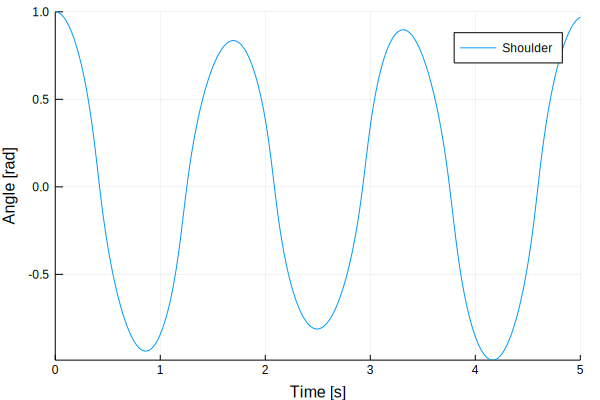

In [9]:
plot(ts, collect(q[1] for q in qs), xlabel = "Time [s]", ylabel = "Angle [rad]", lab = "Shoulder")

# The basic design of  `Mechanism` and `MechanismState`

A `Mechanism` is an interconnection of rigid bodies and joints, without any state information:

In [10]:
collect(bodies(doublependulum))

4-element Array{RigidBodyDynamics.RigidBody{Float64},1}:
 world     
 base_link 
 upper_link
 lower_link

In [11]:
collect(joints(doublependulum))

3-element Array{RigidBodyDynamics.Joint{Float64,JT} where JT<:RigidBodyDynamics.JointType{Float64},1}:
 base_link_to_world
 shoulder          
 elbow             

A `MechanismState` has all the state information, e.g. the configurations and velocities of all the joints:

In [12]:
configuration(state)

2-element RigidBodyDynamics.CustomCollections.SegmentedVector{RigidBodyDynamics.JointID,Float64,Base.OneTo{RigidBodyDynamics.JointID},Array{Float64,1}}:
  0.969077
 -1.51322 

In [13]:
velocity(state)

2-element RigidBodyDynamics.CustomCollections.SegmentedVector{RigidBodyDynamics.JointID,Float64,Base.OneTo{RigidBodyDynamics.JointID},Array{Float64,1}}:
 0.293823 
 0.0921139

It also has various cached computation results meant to reduce double work while computing various kinematic/dynamic quantities.

# Kinematics

Let's unpack the list of joints into separate variables:

In [14]:
fixedjoint, shoulder, elbow = (joints(doublependulum)...)

(Joint "base_link_to_world": Fixed joint, Joint "shoulder": Revolute joint with axis [0.0, 1.0, 0.0], Joint "elbow": Revolute joint with axis [0.0, 1.0, 0.0])

Many objects have frame annotations in the form of `CartesianFrame3D` objects:

In [15]:
frame_after(shoulder)

CartesianFrame3D: "after_shoulder" (id = 5)

In [16]:
frame_before(shoulder)

CartesianFrame3D: "before_shoulder" (id = 4)

Here's how you create a point in the frame after the elbow joint:

In [17]:
p = Point3D(frame_after(elbow), SVector(1., 2., 3.))

Point3D in "after_elbow": [1.0, 2.0, 3.0]

Transform it to world frame in the current state:

In [18]:
p = transform(state, p, root_frame(doublependulum))

Point3D in "world": [-1.52184, 2.25, 2.51834]

Now suppose we have a displacement we defined in `elbow.frameAfter`:

In [19]:
displacement = FreeVector3D(frame_after(elbow), SVector(2., 3., 4.))

FreeVector3D in "after_elbow": [2.0, 3.0, 4.0]

and we want to add it to `p`:

In [20]:
try
    p + displacement
catch err
    println("failed!")
    err
end

failed!


ArgumentError("p.frame: \"world\" (id = 0) ≠ v.frame: \"after_elbow\" (id = 8)")

Excercise: how to fix?

You can also ask for the homogeneous transform to world:

In [21]:
transform_to_root(state, frame_after(elbow))

Transform3D from "after_elbow" to "world":
rotation: 0.5441416196451528 rad about [0.0, -1.0, 0.0], translation: [-0.824363, 0.25, -0.566061]

Or a relative transform:

In [22]:
relative_transform(state, frame_after(elbow), frame_after(shoulder))

Transform3D from "after_elbow" to "after_shoulder":
rotation: 1.513218147543694 rad about [0.0, -1.0, 0.0], translation: [0.0, 0.1, -1.0]

Here's the center of mass of the double pendulum in the given state:

In [23]:
center_of_mass(state)

Point3D in "world": [-0.359431, 0.2, -0.852332]

Motion between bodies is represented using `Twist`s:

In [24]:
twist = relative_twist(state, frame_after(elbow), frame_before(shoulder))

Twist of "after_elbow" w.r.t "before_shoulder" in "world":
angular: [0.0, 0.385937, 0.0], linear: [0.0521421, 0.0, -0.0759353]

In [25]:
transform(state, twist, frame_after(elbow))

Twist of "after_elbow" w.r.t "before_shoulder" in "after_elbow":
angular: [0.0, 0.385937, 0.0], linear: [-0.0169085, 0.0, 0.293336]

# Dynamics

A `MechanismState` can also be used to compute quantities related to the dynamics of the `Mechanism`. Here we compute the mass matrix:

In [26]:
mass_matrix(state)

2×2 Symmetric{Float64,Array{Float64,2}}:
 2.77809  1.38755
 1.38755  1.33   

Here's the documentation for `mass_matrix` by the way:

In [27]:
?mass_matrix

search: mass_matrix mass_matrix!



```julia
mass_matrix(state)

```

Compute the joint-space mass matrix (also known as the inertia matrix) of the `Mechanism` in the given state, i.e., the matrix $M(q)$ in the unconstrained joint-space equations of motion

$$
M(q) \dot{v} + c(q, v, w_\text{ext}) = \tau
$$

This method implements the composite rigid body algorithm.


Note that there is also a zero-allocation version, `mass_matrix!` (the `!` at the end of a method is a Julia convention signifying that the function is 'in-place', i.e. modifies its input data).

We can do inverse dynamics as follows (note again that there is a non-allocating version of this method as well):

In [28]:
v̇ = similar(velocity(state))
v̇ .= [2.; 3.] # the joint acceleration vector, i.e., the time derivative of the joint velocity vector v
inverse_dynamics(state, v̇)

2-element RigidBodyDynamics.CustomCollections.SegmentedVector{RigidBodyDynamics.JointID,Float64,Base.OneTo{RigidBodyDynamics.JointID},Array{Float64,1}}:
 16.8334 
  1.60042

For forward dynamics, one first creates a `DynamicsResult` object, which preallocates a bunch of stuff:

In [29]:
result = DynamicsResult{Float64}(doublependulum);

In [30]:
dynamics!(result, state)

In [31]:
result.v̇

2-element RigidBodyDynamics.CustomCollections.SegmentedVector{RigidBodyDynamics.JointID,Float64,Base.OneTo{RigidBodyDynamics.JointID},Array{Float64,1}}:
 -9.3969
 13.6867

# Combining RigidBodyDynamics with Other Tools

RigidBodyDynamics.jl is a good component for robotics development, but it becomes much more useful when we compose it with other Julia tools. Julia makes it very easy to create generic types and functions that work well with types and functions from other packages to create new behaviors. 

To demonstrate this flexibility, we'll try doing the following:

* Computing symbolic quantities with SymPy.jl
* Revisiting automatic differentiation with ForwardDiff.jl
* Propagating uncertainty with Measurements.jl (see the next notebook)

## Symbolic Quantities

We can get symbolic representations of the kinematics and dynamics of a robot by simply constructing an appropriate mechanism or state. In this case, we'll use [SymPy.jl](https://github.com/JuliaPy/SymPy.jl) which is simply a nice Julia wrapper around the SymPy Python package. 

## Setup

In [ ]:
# Make SymPy use version of Python downloaded through Julia's package system instead of system Python
ENV["PYTHON"]=""
Pkg.build("SymPy")

In [ ]:
using SymPy

To get a symbolic expression for the mass matrix of the double pendulum in terms of its configuration and velociy, we simply need to create symbolic quantities for q and v: 

In [34]:
@syms q1 q2 real=true
@syms v1 v2 real=true

(v1, v2)

In [35]:
q = [q1, q2]
v = [v1, v2]

simplify.(mass_matrix(MechanismState(doublependulum, q, v)))

2×2 Array{SymPy.Sym,2}:
 2.0*cos(q2) + 2.663  1.0*cos(q2) + 1.33
  1.0*cos(q2) + 1.33    1.33000000000000

## Automatic Differentiation

A very common task in robotics is computing the derivative, gradient, or Jacobian of some quantity with respect to some other quantity. 

For example, suppose we want the Jacobian of momentum with respect to the joint velocity vector $v$. We can do this using the `ForwardDiff.Dual` type and the `ForwardDiff.jacobian` function.

First, we need to write a function that computes the quantity we're interested in, as a function of $v$: 

In [36]:
q = configuration(state)
v = velocity(state)

function mom(v::AbstractVector)
    # create a `MechanismState` that can handle the element type of `v` (which will be some `ForwardDiff.Dual`):
    state = MechanismState{eltype(v)}(doublependulum)
    
    # set the state variables:
    set_configuration!(state, q)
    set_velocity!(state, v)
    
    # return momentum converted to an `Array` (as this is the format that ForwardDiff expects)
    Array(momentum(state))
end

mom (generic function with 1 method)

First, let's test `mom()` against the existing `momentum` function: 

In [37]:
@test mom(v) == Array(momentum(state))

Test Passed

Computing the Jacobian is just a matter of calling `ForwardDiff.jacobian`: 

In [38]:
using ForwardDiff

In [39]:
J = ForwardDiff.jacobian(mom, v)

6×2 Array{Float64,2}:
  0.138497  -0.129421
  2.77809    1.38755 
  0.397863   0.213893
 -1.70466   -0.855572
  0.0        0.0     
  0.718861  -0.517684

At this point we note that the matrix $J$ is simply the momentum matrix (in world frame) of the Mechanism. In this case, [RigidBodyDynamics.jl](https://github.com/JuliaRobotics/RigidBodyDynamics.jl) has a specialized algorithm for computing this matrix, so let's verify the results:

In [40]:
@test J ≈ Array(momentum_matrix(state)) atol = 1e-12

Test Passed

### Improving Performance

The naive implementation of `mom()` above will be somewhat slow, in part because it will construct a brand-new MechanismState every time. To learn more about improving performance of ForwardDiff with RigidBodyDynamics, see: https://github.com/JuliaRobotics/RigidBodyDynamics.jl/blob/master/notebooks/Derivatives%20and%20gradients%20using%20ForwardDiff.ipynb

Now we've covered symbolics and autodiff. For a demonstration of uncertainty propagation, check out the next notebook...

# More info

Documentation is available at http://www.juliarobotics.org/RigidBodyDynamics.jl/stable/.

More example notebooks can be found [here](https://github.com/JuliaRobotics/RigidBodyDynamics.jl/tree/master/notebooks). These examples include:

* creating a four-bar linkage (kinematic loops implemented using Lagrange multipliers)
* basic simulation with a controller in the loop (but see [RigidBodySim.jl](https://github.com/JuliaRobotics/RigidBodySim.jl) for a more full-fledged implementation).
* computing guaranteed error bounds by combining RigidBodyDynamics.jl with [IntervalArithmetic.jl](https://github.com/JuliaIntervals/IntervalArithmetic.jl).